In [16]:
from pathlib import Path
from urllib.parse import urlparse
import requests
import json
from PIL import Image
from io import BytesIO
from matplotlib import patches
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [17]:
subscription_key = '36886754a3454c0fafd50c6391daa678'
face_api_url = 'https://clients-segmentation.cognitiveservices.azure.com/face/v1.0/detect'
face_api_url_verify = 'https://clients-segmentation.cognitiveservices.azure.com/face/v1.0/verify'

In [18]:
image_url = 'https://amp.insider.com/images/5a9878b3267894f3058b4676-640-480.jpg'
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId':
    'true',
    'returnFaceLandmarks':
    'false',
    'returnFaceAttributes':
    'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url,
                        params=params,
                        headers=headers,
                        json={"url": image_url})

In [19]:
hola=response.json()

In [20]:
def annotate_image(image_url, subscription_key, api_url, show_face_id=False):
    """ Helper function for Microsoft Azure face detector.

    Args:
        image_url: Can be a remote http://  or file:// url pointing to an image less then 10MB
        subscription_key: Cognitive services generated key
        api_url: API end point from Cognitive services
        show_face_id: If True, display the first 6 characters of the faceID

    Returns:
        figure: matplotlib figure that contains the image and boxes around the faces with their age and gender
        json response: Full json data returned from the API call

    """

    # The default header must include the sunbscription key
    headers = {'Ocp-Apim-Subscription-Key': subscription_key}

    params = {
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
    }

    # Figure out if this is a local file or url
    parsed_url = image_url
    image_data = open(parsed_url, "rb").read()

    # When making the request, we need to add a Content-Type Header
    # and pass data instead of a url
    headers['Content-Type']='application/octet-stream'
    response = requests.post(api_url, params=params, headers=headers, data=image_data)

    # Open up the image for plotting
    image = Image.open(parsed_url)

    faces = response.json()

    fig, ax = plt.subplots(figsize=(10,10))

    ax.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        fm = face["faceAttributes"]["emotion"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"],
                            fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        if fa["gender"] == 'female':
            sexo="Mujer"
        elif fa["gender"] == 'male':
            sexo="Hombre"
        else:
            sexo= None
        ax.text(origin[0], origin[1], "%s, %d"%(sexo.capitalize(), fa["age"]),
                fontsize=16, weight="bold", va="bottom")
        
        v, k = max((v, k) for k, v in fm.items())
        if k == 'anger':
            estado="Enojado"
        elif k == 'contempt':
            estado="No contento"
        elif k == 'disgust':
            estado="Disgustado"
        elif k == 'fear':
            estado="Atemorizado"
        elif k == 'happiness':
            estado="Feliz"
        elif k == 'neutral':
            estado="Neutro"
        elif k == 'sadness':
            estado="Triste"
        elif k == 'surprise':
            estado="Sorprendido"
        else:
            estado=None
        if show_face_id:
            ax.text(origin[0], origin[1]+fr["height"], "%s"%(estado),
            fontsize=12, va="bottom")
    ax.axis("off")

    # Explicitly closing image so it does not show in the notebook
    plt.close()
    return fig, faces

In [ ]:
def face_compare(id_1, id_2, api_url):
    """ Determine if two faceIDs are for the same person
    Args:
        id_1: faceID for person 1
        id_2: faceID for person 2
        api_url: API end point from Cognitive services
        show_face_id: If True, display the first 6 characters of the faceID

    Returns:
        json response: Full json data returned from the API call

    """
    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': subscription_key
    }

    body = {"faceId1": id_1, "faceId2": id_2}

    params = {}
    response = requests.post(api_url,
                            params=params,
                            headers=headers,
                            json=body)
    data = response.json()
    data3 = data['isIdentical']
    data2 = data['confidence']
    return data3, data2

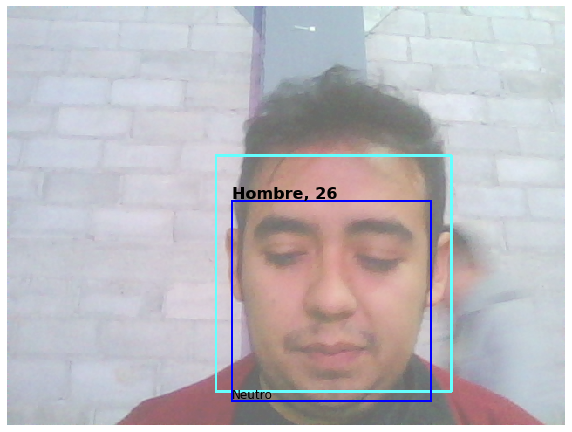

In [21]:
labeled_image, response_1 = annotate_image(
    'image2.png',
    subscription_key,
    face_api_url,
    show_face_id=True)

In [27]:
csv.register_dialect('myDialect', delimiter = '|')
with open('Table fotografias customers.csv', 'r') as csvFile:
        reader = csv.reader(csvFile, dialect = 'myDialect')
        ix = 0
        for row in reader:
            if ix > 0:
                john_k_2 = row[0]
                print(john_k_2)
                labeled_image, response_2 = annotate_image(john_k_2, subscription_key, face_api_url, show_face_id=True)
                data4 = face_compare(response_2[0]['faceId'], response_1[0]['faceId'], face_api_url_verify)
                val2 = data4[1]
                data5 = data4[0]
                print(data5)
                print(val2)
                if data5 == False:
                    print("False")
                else:
                    print("Existe en base de datos")
            ix = ix + 1
csvFile.close()

13047.png


NameError: name 'data4' is not defined